<a href="https://colab.research.google.com/github/jorgefpont/Coursera-ML-class/blob/master/ML_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**2. Linear Regression with one Variable**


---





In [80]:
# load data file from my github repo
url = 'https://raw.githubusercontent.com/jorgefpont/Coursera-ML-class/master/machine-learning-ex1/ex1/ex1data1.txt'

# load file into pandas data frame
food_truck = pd.read_csv(url, header = None)

# explore file
print(food_truck.head(),"\n")
print(food_truck.info(),"\n")
print(food_truck.describe())

        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
0    97 non-null float64
1    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB
None 

               0          1
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


**Note on np.newaxis:** When you read data into X, y you will observe that X, y are rank 1 arrays. rank 1 array will have a shape of (m, ) where as rank 2 arrays will have a shape of (m,1). When operating on arrays its good to convert rank 1 arrays to rank 2 arrays because rank 1 arrays often give unexpected results.
To convert rank 1 to rank 2 array we use someArray[:,np.newaxis]

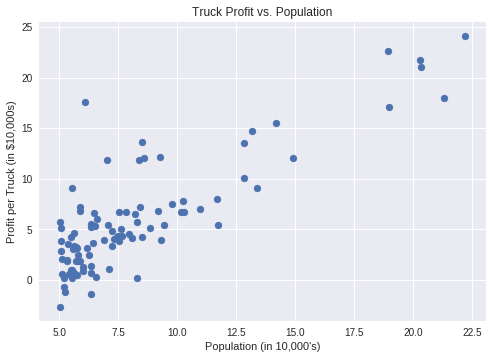

In [81]:
# convert csv file to array
d = np.array(food_truck)

# separate X (1st column) and y (second column)
X = np.array(d[:,0])
y = np.array(d[:,1])

# type into proper arrays (see note above)
X = X[:,np.newaxis]
y = y[:,np.newaxis]

plt.scatter(X, y)
plt.title("Truck Profit vs. Population")
plt.ylabel("Profit per Truck (in $10,000s)")
plt.xlabel("Population (in 10,000's)")
plt.show()

In [0]:
def gradientDescent(X, y, theta, alpha, iterations):
  ''' returns both the theta vector and 
  a list of cost values per iteration'''
  
  jvec=[]
  for iter in range(iterations):
      # calc derivatives
      del_J = (1/m) * np.dot(np.transpose(X), np.dot(X,theta)-y)
      theta = theta - alpha * del_J
      jvec.append(costFunction(X,y,theta))
  return theta,jvec

In [0]:
def costFunction(X, y, theta):
  m,n = np.shape(X)  # m=rows, n=cols
  J = (1/(2*m)) * ( np.transpose((X@theta)-y) @ ((X@theta)-y) )
  return np.asscalar(J)  

In [84]:
# add column of ones to X
m,n = np.shape(X)  # m=rows, n=cols
X = np.column_stack((np.ones((m,1)), X))

# initialize theta, an n+1 x1 vector
# n is the number of features
theta = np.zeros((n+1,1))

# other parameters
alpha=0.01
iterations = 1500

theta, jvec = gradientDescent(X, y, theta, alpha, iterations)
J = costFunction(X,y, theta)

print("J = \n", J)
print("theta = \n", theta)
print(m,n)

#plt.scatter(*zip(*jvec))
#plt.show()

J = 
 4.483388256587725
theta = 
 [[-3.63029144]
 [ 1.16636235]]
97 1


**Plot with learned line**

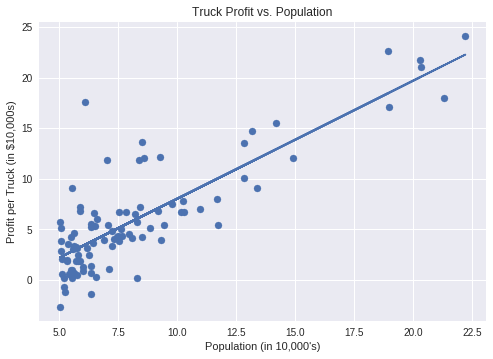

In [85]:
X_ = np.array(d[:,0])
y_ = np.array(d[:,1])
plt.scatter(X_, y_)
# new line
plt.plot(X_, np.dot(X, theta))

plt.title("Truck Profit vs. Population")
plt.ylabel("Profit per Truck (in $10,000s)")
plt.xlabel("Population (in 10,000's)")
plt.show()

**3. Linear Regression with Multiple Variables**


---



The file ex1data2.txt contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house. *italicized text*

By looking at the values, note that house sizes are about
1000 times the number of bedrooms. When features differ by orders of mag-
nitude, first performing feature scaling can make gradient descent converge
much more quickly.

To feature normalize:
(a) Subtract the mean value of each feature from the dataset.
(b) After subtracting the mean, additionally scale (divide) the feature values
by their respective “standard deviations.”

You will do this for all the features and your code should work with
datasets of all sizes (any number of features / examples). Note that each
column of the matrix X corresponds to one feature. *italicized text*


In [86]:
url = 'https://raw.githubusercontent.com/jorgefpont/Coursera-ML-class/master/machine-learning-ex1/ex1/ex1data2.txt'
# food_truck = pd.read_csv("ex1data1.txt", header = None)
houses = pd.read_csv(url, header = None)
print(houses.head(),"\n")
print(houses.info(),"\n")
print(houses.describe())

      0  1       2
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
0    47 non-null int64
1    47 non-null int64
2    47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB
None 

                 0          1              2
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [87]:
# feature normalization in Pandas
# for each element in X, subtract the mean of its corresponding column,
# divide by the standard deviation of the corresponding column

houses[0] = (houses[0] - houses[0].mean()) / houses[0].std()
houses[1] = (houses[1] - houses[1].mean()) / houses[1].std()

area_mean = houses[0].mean()
rooms_mean = houses[1].mean()
area_std = houses[0].std()
rooms_std = houses[1].mean()

print(houses.head(),"\n")

          0         1       2
0  0.130010 -0.223675  399900
1 -0.504190 -0.223675  329900
2  0.502476 -0.223675  369000
3 -0.735723 -1.537767  232000
4  1.257476  1.090417  539900 



In [0]:
# convert csv file to array
d2 = np.array(houses)

# separate X (1st 2 columns) and y (second column)
X = np.array(d2[:,0:2])
y = np.array(d2[:,2])

# type y into proper vector array
y = y[:,np.newaxis]



J = 
 2043544218.7812893
theta = 
 [[340397.96353532]
 [109848.00846026]
 [ -5866.45408497]]


[]

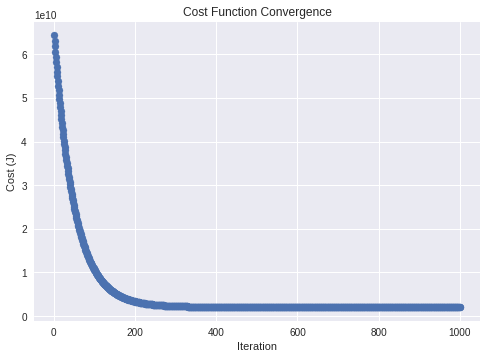

In [89]:
# add column of ones to X
m,n = np.shape(X)  # m=rows, n=cols
X = np.column_stack((np.ones((m,1)), X))

# initialize theta, an n+1 x1 vector
# n is the number of features
theta = np.zeros((n+1,1))

# other parameters
alpha=0.01
iterations = 1000

theta, jvec = gradientDescent(X, y, theta, alpha, iterations)
J = costFunction(X,y, theta)

print("J = \n", J)
print("theta = \n", theta)

# plot J vs iteration
iter = list(range(1,len(jvec)+1))
plt.scatter(iter, jvec)
plt.title("Cost Function Convergence")
plt.ylabel("Cost (J)")
plt.xlabel("Iteration")
plt.plot()
